# Instruction

In this assignment, you will analyze the political tweets during the campaign of the 2017 UK General Election. The twitter database is available at the link below (it's zipped, so you need to decompress before working on it). 

https://www.dropbox.com/s/jh40sd8xebjg9pn/ge_2017.sqlite.zip?dl=1


## Data description

When I collected the data, I saved the streamed twitter data every 15 minutes. The condition of streaming is to get the all tweets from the candidates and party official accounts and replies/retweets to the tweets from these accounts. I randomy selected 10 percent of data files for this assignment. 

After selecting the data I created two tables from the data, one for twitter contents, and another for user information. All the field names are original names from twitter json, so it should be easy to understand the contents. I added one field to the user table, which is `screen_name_in` where the value 1 indicates the election candidates' or party official accounts. 0 indicate otherwise.




# Load packages

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 1000)
import sqlite3 
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style(style = 'whitegrid')
%matplotlib inline

# Connect to the database

In [2]:
connected = sqlite3.connect("ge_2017.sqlite")

# Check the database (3 percent)

How many tweets are in the tweet table? How many users in the users table?

In [3]:
pd.read_sql_query("SELECT * FROM sqlite_master WHERE type='table'", connected)


,type,name,tbl_name,rootpage,sql
0,table,tweets,tweets,2,"CREATE TABLE `tweets` (\n `doc_id` TEXT,\n `text` TEXT,\n `retweet_count` REAL,\n `favorite_count` REAL,\n `favorited` INTEGER,\n `truncated` INTEGER,\n `id_str` TEXT,\n `in_reply_to_screen_name` TEXT,\n `source` TEXT,\n `retweeted` INTEGER,\n `created_at` TEXT,\n `in_reply_to_status_id_str` TEXT,\n `in_reply_to_user_id_str` TEXT,\n `lang` TEXT,\n `listed_count` REAL,\n `user_id_str` TEXT,\n `country_code` TEXT,\n `country` TEXT,\n `place_type` TEXT,\n `full_name` TEXT,\n `place_name` TEXT,\n `place_id` TEXT,\n `place_lat` REAL,\n `place_lon` REAL,\n `lat` REAL,\n `lon` REAL,\n `expanded_url` TEXT,\n `url` TEXT,\n `created_at_dt` REAL\n)"
1,table,users,users,21681,"CREATE TABLE `users` (\n `verified` INTEGER,\n `location` TEXT,\n `user_id_str` TEXT,\n `description` TEXT,\n `geo_enabled` INTEGER,\n `user_created_at` TEXT,\n `statuses_count` REAL,\n `followers_count` REAL,\n `favourites_count` REAL,\n `protected` INTEGER,\n `user_url` TEXT,\n `name` TEXT,\n `time_zone` TEXT,\n `user_lang` TEXT,\n `utc_offset` REAL,\n `friends_count` REAL,\n `screen_name` TEXT,\n `user_created_at_dt` REAL,\n `screen_name_in` INTEGER\n)"


In [4]:
no_tweets = pd.read_sql_query("SELECT COUNT(*) FROM tweets", connected)
no_tweets

,COUNT(*)
0,221711


In [5]:
no_users = pd.read_sql_query("SELECT COUNT(*) FROM users", connected)
no_users

,COUNT(*)
0,91256


# Description of the data (21 percents, 3 per question)

Answer the following questions (try to do most computation in the query, if you do some work in Python, you will only get partial credit):

1. Which screen_name has the highest count of tweets?
2. Who has the highest number of followers? 
3. Among politicians, who has the highest number of followers ?
4. Which tweet has the earliest timestamp in the data? Which is the latest?
5. Who were the top ten most replied account? How many times?
6. How many tweets with the word brexit? 
7. How many tweets have geolocation information (`lat` or `lon` value)? (You'd be surprised how small the number is.)


In [6]:
pd.read_sql_query("SELECT * FROM tweets", connected)

,doc_id,text,retweet_count,favorite_count,favorited,truncated,id_str,in_reply_to_screen_name,source,retweeted,created_at,in_reply_to_status_id_str,in_reply_to_user_id_str,lang,listed_count,user_id_str,country_code,country,place_type,full_name,place_name,place_id,place_lat,place_lon,lat,lon,expanded_url,url,created_at_dt
0,tw_json_6_201705261745.json.1,RT @BenRich66: If you work in tech and are backing @libdems then this will interest you https://t.co/tWDj1dWU6R,0.0,0.0,0,0,868157285226491905,None,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",0,Fri May 26 17:30:01 +0000 2017,None,None,en,264.0,20255744,None,None,None,None,None,None,NaN,NaN,NaN,NaN,http://www.libdems.org.uk/tech-backing-libdems,https://t.co/tWDj1dWU6R,1.495820e+09
1,tw_json_6_201705261745.json.2,RT @AngelaRayner: Whilst polls can fluctuate it appears the Tories attempt to relaunch their campaign has been abandoned? 👎https://t.co/6mh…,0.0,0.0,0,0,868157291270467584,None,"<a href=""https://www.chicmi.com/"" rel=""nofollow"">Chicmi</a>",0,Fri May 26 17:30:02 +0000 2017,None,None,en,13.0,1871497250,None,None,None,None,None,None,NaN,NaN,NaN,NaN,None,None,1.495820e+09
2,tw_json_6_201705261745.json.3,"RT @aw_bell: We must defend our freedoms from Tory attack otherwise we are doing the terrorists work for them, @Molly4Bristol tells @BCfmRa…",0.0,0.0,0,0,868157295083102210,None,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",0,Fri May 26 17:30:03 +0000 2017,None,None,en,188.0,427599291,None,None,None,None,None,None,NaN,NaN,NaN,NaN,None,None,1.495820e+09
3,tw_json_6_201705261745.json.4,RT @UKLabour: Education should be available to all. That's why we'll scrap tuition fees and bring back grants. With us? RT ↓ https://t.co/M…,0.0,0.0,0,0,868157295938633729,None,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",0,Fri May 26 17:30:03 +0000 2017,None,None,en,20.0,317402880,None,None,None,None,None,None,NaN,NaN,NaN,NaN,None,None,1.495820e+09
4,tw_json_6_201705261745.json.5,RT @RichardBurgon: The stakes are high in this election! We're enjoying working hard here in East #Leeds in the blazing hot sun!…,0.0,0.0,0,0,868157297750671361,None,"<a href=""http://twitter.com/#!/download/ipad"" rel=""nofollow"">Twitter for iPad</a>",0,Fri May 26 17:30:04 +0000 2017,None,None,en,21.0,4309416083,None,None,None,None,None,None,NaN,NaN,NaN,NaN,https://twitter.com/i/web/status/868157297981349888,,1.495820e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221706,tw_json_6_201706080815.json.5652,"RT @jeremycorbyn: We've left no place and no stone unturned, to get the message out: that this country could be very different with a…",0.0,0.0,0,0,872728653003710464,None,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",0,Thu Jun 08 08:15:00 +0000 2017,None,None,en,0.0,816271057518788608,None,None,None,None,None,None,NaN,NaN,NaN,NaN,http://bit.ly/2s0qDvb,,1.496910e+09
221707,tw_json_6_201706080815.json.5653,@jaybn1 Thank you so much Jay x,0.0,0.0,0,0,872728653439881216,jaybn1,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",0,Thu Jun 08 08:15:00 +0000 2017,872726001909981184,97737435,en,57.0,3423754060,None,None,None,None,None,None,NaN,NaN,NaN,NaN,None,None,1.496910e+09
221708,tw_json_6_201706080815.json.5654,"@jeremycorbyn @UKLabour Thank you Jeremy and the Labour Party for a brilliant campaign, for bringing hope the the m… https://t.co/oukwP2KIkL",0.0,0.0,0,1,872728653444132864,jeremycorbyn,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",0,Thu Jun 08 08:15:00 +0000 2017,872719287785578496,117777690,en,0.0,280687043,None,None,None,None,None,None,NaN,NaN,NaN,NaN,http://bit.ly/2s0qDvb,https://t.co/oukwP2KIkL,1.496910e+09
221709,tw_json_6_201706080815.json.5655,RT @Conservatives: TM: We cannot and must no

In [7]:
pd.read_sql_query("SELECT * FROM users", connected)

,verified,location,user_id_str,description,geo_enabled,user_created_at,statuses_count,followers_count,favourites_count,protected,user_url,name,time_zone,user_lang,utc_offset,friends_count,screen_name,user_created_at_dt,screen_name_in
0,0,Mostly in Liverpool,20255744,"Leader Liverpool Lib Dems, Lib Dem Spokesperson on health and social care, LGA. Lib Dem Parliamentary Candidate for Liverpool Wavertree",1,Fri Feb 06 17:54:34 +0000 2009,42343.0,3914.0,158.0,0,http://richardkemp.org.uk,Richard Kemp CBE,Amsterdam,en,7200.0,632.0,cllrkemp,1.233943e+09,1
1,0,"London, UK",1871497250,I tweet the top stories that Westminster are talking about right now. A UK political robot by @jamiembrown,0,Mon Sep 16 12:33:23 +0000 2013,9262.0,258.0,23407.0,0,None,govmixx,None,en,NaN,865.0,govmixx,1.379335e+09,0
2,0,"Easton/Lawrence Hill, Bristol",427599291,Field Organiser for @TheGreenParty,1,Sat Dec 03 18:43:42 +0000 2011,39943.0,5595.0,2390.0,0,http://robtelford.com,Rob Telford,London,en,3600.0,4819.0,GreenRobTelford,1.322938e+09,0
3,0,"Bury, England",317402880,"Chippy Yorkshireman, Labour & Remain supporter. Used to play a bit of rugby. Making the country a fairer place for all. Don't make me use my economist voice!",0,Tue Jun 14 21:51:59 +0000 2011,4060.0,145.0,2937.0,0,None,Manumission,None,en,NaN,312.0,lockforward4,1.308088e+09,0
4,0,None,4309416083,None,0,Sat Nov 28 17:43:36 +0000 2015,26420.0,270.0,14127.0,0,None,Donald Duck,London,en-gb,3600.0,435.0,maninthestreet9,1.448733e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91251,0,None,2797239140,None,1,Mon Sep 08 04:29:26 +0000 2014,133.0,21.0,242.0,0,None,Prasad Kulkarni,None,en,NaN,174.0,praskulkarni,1.410151e+09,0
91252,0,None,1086467299,"18, Obsessed with @ATC_BAND, @twentyonepilots and @taylorswift13. But this Twitter is basically retweeting @ChrissyCostanza 😅",0,Sun Jan 13 15:47:49 +0000 2013,529.0,43.0,2256.0,0,None,Anna,Berlin,de,7200.0,13.0,AnnaLtsch,1.358092e+09,0
91253,0,None,491192619,None,1,Mon Feb 13 10:55:44 +0000 2012,184.0,71.0,3.0,0,None,Graham Rees,None,en,NaN,90.0,mrshoetrees,1.329131e+09,0
91254,0,Live in Edinburgh but born a West Yorkshire lass.,816271057518788608,"Lover of music, all animals and wildlife, space and our beautiful planet, nature and photography. Have a gorgeous black cat called Lucy.",0,Tue Jan 03 13:12:40 +0000 2017,504.0,43.0,2892.0,0,None,Suzanne Hirst,None,en-gb,NaN,60.0,SuzanneHirst5,1.483449e+09,0


In [8]:
#1
max_tweet =  pd.read_sql_query("SELECT screen_name, statuses_count FROM users ORDER BY statuses_count DESC LIMIT 1", connected)
max_tweet

,screen_name,statuses_count
0,t_hisashi,3256136.0


In [9]:
#2 
max_followers = pd.read_sql_query("SELECT screen_name, followers_count FROM users ORDER BY followers_count DESC LIMIT 1", connected)
max_followers 

,screen_name,followers_count
0,rickygervais,12419966.0


In [10]:
#3
max_pol_followers = pd.read_sql_query("SELECT screen_name, followers_count FROM users WHERE screen_name_in = 1 ORDER BY followers_count DESC LIMIT 1", connected)
max_pol_followers 

,screen_name,followers_count
0,jeremycorbyn,968629.0


In [11]:
#4.1
earliest_timestamp = pd.read_sql_query("SELECT created_at, source, text, created_at_dt FROM tweets ORDER BY created_at_dt LIMIT 1", connected)
earliest_timestamp

,created_at,source,text,created_at_dt
0,Fri May 26 17:30:01 +0000 2017,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @BenRich66: If you work in tech and are backing @libdems then this will interest you https://t.co/tWDj1dWU6R,1.495820e+09


In [12]:
#4.2
latest_timestamp = pd.read_sql_query("SELECT created_at, source, text, created_at_dt FROM tweets ORDER BY created_at_dt DESC LIMIT 1", connected)
latest_timestamp

,created_at,source,text,created_at_dt
0,Thu Jun 08 08:15:00 +0000 2017,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>","RT @jeremycorbyn: We've left no place and no stone unturned, to get the message out: that this country could be very different with a…",1.496910e+09


In [13]:
#5
most_replied = pd.read_sql_query("SELECT in_reply_to_screen_name, COUNT(*) AS replied_to FROM tweets WHERE in_reply_to_screen_name != 'None' GROUP BY in_reply_to_screen_name ORDER BY replied_to DESC LIMIT 10", connected)
most_replied

,in_reply_to_screen_name,replied_to
0,Conservatives,8590
1,jeremycorbyn,7533
2,theresa_may,5563
3,BorisJohnson,3656
4,UKLabour,1504
5,HackneyAbbott,888
6,Jeremy_Hunt,816
7,JamesCleverly,472
8,paulnuttallukip,464
9,LibDems,420


In [14]:
#6
brexit_ment = pd.read_sql_query("SELECT COUNT(*) FROM tweets WHERE text LIKE '%brexit%' " , connected)
brexit_ment

,COUNT(*)
0,9028


In [15]:
#7
loc_lat_val = pd.read_sql_query("SELECT COUNT(*) FROM tweets WHERE lat != 'NaN' OR lon != 'NaN'" , connected)
loc_lat_val

,COUNT(*)
0,35


In [16]:
pd.read_sql_query('SELECT COUNT(*) FROM tweets WHERE retweet_count = 1', connected)

,COUNT(*)
0,0


# Use of hashtags (12 percent)

In this section you will work on hashtags in tweets. If you are not sure what is hashtags, please refer to: https://business.twitter.com/en/blog/how-to-create-and-use-hashtags.html

### Tasks:

1. Think about the ways to extract hashtags from the twitter text. The goal here is to create a two column DataFrame where the first column is tweet id (`id_str`) and the second column is the content of the hashtag (e.g. `#ge2017`, `#conservative`). 

2. Using the dataframe and the database, find the following:
  - What's the 10 most popular hashtag?
  - What's the 10 most popular hashtags by political twitter accounts (i.e. election candidates/parties)? What about non-politician/parties account?




In [17]:
text1 = pd.read_sql_query("SELECT user_id_str, id_str, text FROM tweets " , connected)
text1.head(50)

,user_id_str,id_str,text
0,20255744,868157285226491905,RT @BenRich66: If you work in tech and are backing @libdems then this will interest you https://t.co/tWDj1dWU6R
1,1871497250,868157291270467584,RT @AngelaRayner: Whilst polls can fluctuate it appears the Tories attempt to relaunch their campaign has been abandoned? 👎https://t.co/6mh…
2,427599291,868157295083102210,"RT @aw_bell: We must defend our freedoms from Tory attack otherwise we are doing the terrorists work for them, @Molly4Bristol tells @BCfmRa…"
3,317402880,868157295938633729,RT @UKLabour: Education should be available to all. That's why we'll scrap tuition fees and bring back grants. With us? RT ↓ https://t.co/M…
4,4309416083,868157297750671361,RT @RichardBurgon: The stakes are high in this election! We're enjoying working hard here in East #Leeds in the blazing hot sun!…
5,751503903791906816,868157297981349888,@julianhuppert @jeremycorbyn @jon_bartley Green Party undivided on grotesque Trident @sianberry but some sypathy wi… https://t.co/4xTaXvGFj1
6,2768195631,868157300556615680,RT @joannaccherry: 🔍 FACTCHECK: @RuthDavidsonMSP “Child poverty has fallen since 2010… inequality has fallen since 2010 when Tories ca…
7,39032403,868157302800605185,"Lib Dems would give Humberside Police force an extra £4,470,000 a year https://t.co/0ch7klC74G"
8,2583270112,868157303651840000,Less than 2 weeks until #GE2017. Team #Cherry4EdinSW are campaigning at Westside Plaza tomorrow at 10AM. Join us! https://t.co/B6P6dJiUIp
9,2912699739,868157299021553664,Why people are voting Labour in Harborough #GE17 #Labour #Harborough https://t.co/0E1DJPaB8V


In [18]:
df_hashtags = pd.DataFrame(text1, columns = ["user_id_str", "id_str","text"])
df_hashtags

,user_id_str,id_str,text
0,20255744,868157285226491905,RT @BenRich66: If you work in tech and are backing @libdems then this will interest you https://t.co/tWDj1dWU6R
1,1871497250,868157291270467584,RT @AngelaRayner: Whilst polls can fluctuate it appears the Tories attempt to relaunch their campaign has been abandoned? 👎https://t.co/6mh…
2,427599291,868157295083102210,"RT @aw_bell: We must defend our freedoms from Tory attack otherwise we are doing the terrorists work for them, @Molly4Bristol tells @BCfmRa…"
3,317402880,868157295938633729,RT @UKLabour: Education should be available to all. That's why we'll scrap tuition fees and bring back grants. With us? RT ↓ https://t.co/M…
4,4309416083,868157297750671361,RT @RichardBurgon: The stakes are high in this election! We're enjoying working hard here in East #Leeds in the blazing hot sun!…
...,...,...,...
221706,816271057518788608,872728653003710464,"RT @jeremycorbyn: We've left no place and no stone unturned, to get the message out: that this country could be very different with a…"
221707,3423754060,872728653439881216,@jaybn1 Thank you so much Jay x
221708,280687043,872728653444132864,"@jeremycorbyn @UKLabour Thank you Jeremy and the Labour Party for a brilliant campaign, for bringing hope the the m… https://t.co/oukwP2KIkL"
221709,1140907986,872728655650271232,RT @Conservatives: TM: We cannot and must not pretend that things can continue as they are when it comes to Islamist extremism. These…


In [19]:
df_hashtags["text"] = df_hashtags["text"].str.extract(r'(#\w+)')
df_hashtags


,user_id_str,id_str,text
0,20255744,868157285226491905,NaN
1,1871497250,868157291270467584,NaN
2,427599291,868157295083102210,NaN
3,317402880,868157295938633729,NaN
4,4309416083,868157297750671361,#Leeds
...,...,...,...
221706,816271057518788608,872728653003710464,NaN
221707,3423754060,872728653439881216,NaN
221708,280687043,872728653444132864,NaN
221709,1140907986,872728655650271232,NaN


In [20]:
df_hashtags = df_hashtags.dropna()
df_hashtags.head(60)

,user_id_str,id_str,text
4,4309416083,868157297750671361,#Leeds
8,2583270112,868157303651840000,#GE2017
9,2912699739,868157299021553664,#GE17
10,20037517,868157309171752961,#GE2017
15,22482677,868157323465953282,#GE2017Economists
22,110268940,868157342021541888,#ECLCM
29,407130360,868157349386694656,#renewableenergy
33,842368742852034560,868157355267117060,#BritainTogether
45,4789160777,868157393988968448,#Ramadan
54,347187254,868157411395293184,#FairerFunding


In [21]:
#top 10 hastags 
df_hashtags['text'].value_counts().head(10) 

#VoteLabour           5814
#GE2017               5761
#ForTheMany           4873
#BattleForNumber10    4469
#FACupFinal           2724
#BBCDebate            2465
#BBCdebate             998
#VoteSNP               920
#VoteConservative      767
#KeepTheBan            764
Name: text, dtype: int64

In [22]:
df_polacc = pd.read_sql_query("SELECT screen_name, user_id_str, screen_name_in FROM users " , connected)
df_polacc

,screen_name,user_id_str,screen_name_in
0,cllrkemp,20255744,1
1,govmixx,1871497250,0
2,GreenRobTelford,427599291,0
3,lockforward4,317402880,0
4,maninthestreet9,4309416083,0
...,...,...,...
91251,praskulkarni,2797239140,0
91252,AnnaLtsch,1086467299,0
91253,mrshoetrees,491192619,0
91254,SuzanneHirst5,816271057518788608,0


In [23]:
df_merge = pd.merge(df_hashtags, df_polacc, on = "user_id_str")
df_merge

,user_id_str,id_str,text,screen_name,screen_name_in
0,4309416083,868157297750671361,#Leeds,maninthestreet9,0
1,4309416083,868425917714116609,#VoteLabour,maninthestreet9,0
2,4309416083,868426104075366400,#VoteLabour,maninthestreet9,0
3,2583270112,868157303651840000,#GE2017,joannaccherry,1
4,2583270112,868427317302964225,#WesterHailes,joannaccherry,1
...,...,...,...,...,...
65420,94187179,872728631423885312,#GE2017,jamnic77,0
65421,3374376179,872728640001384449,#VoteLabour,PhilB6vis,0
65422,3082018204,872728645453983744,#ge2017,lfmcnally,0
65423,1086467299,872728646183784448,#VoteLabour,AnnaLtsch,0


In [24]:
df_mergepol = df_merge[df_merge["screen_name_in"] == 1]
df_mergepol

,user_id_str,id_str,text,screen_name,screen_name_in
3,2583270112,868157303651840000,#GE2017,joannaccherry,1
4,2583270112,868427317302964225,#WesterHailes,joannaccherry,1
5,2583270112,868874529644265473,#Cherry4EdinSW,joannaccherry,1
6,2583270112,869313584857264128,#Cherry4EdinSW,joannaccherry,1
7,2583270112,869580000005165056,#GE17,joannaccherry,1
...,...,...,...,...,...
65332,50269633,872728406252802048,#VoteConservative,ChrisChapman86,1
65350,130857126,872728448141332480,#iVoted,Sally_Keeble,1
65369,1530621674,872728508027596800,#GE2017,RichardGrahamUK,1
65370,216516145,872728512393883649,#VoteLabour,MattRodda,1


In [25]:
#top 10 hashtags from political party
df_mergepol['text'].value_counts().head(10) 

#GE2017               428
#BattleForNumber10    204
#VoteLabour           160
#BBCDebate             79
#GE17                  73
#labourdoorstep        60
#Brexit                53
#UKIP                  46
#ForTheMany            42
#OneLoveManchester     40
Name: text, dtype: int64

In [26]:
df_mergenonpol = df_merge[df_merge["screen_name_in"] == 0]
df_mergenonpol

,user_id_str,id_str,text,screen_name,screen_name_in
0,4309416083,868157297750671361,#Leeds,maninthestreet9,0
1,4309416083,868425917714116609,#VoteLabour,maninthestreet9,0
2,4309416083,868426104075366400,#VoteLabour,maninthestreet9,0
20,20037517,868157309171752961,#GE2017,Jennyanyd0ts,0
21,20037517,868490489548427264,#OxfordEast,Jennyanyd0ts,0
...,...,...,...,...,...
65420,94187179,872728631423885312,#GE2017,jamnic77,0
65421,3374376179,872728640001384449,#VoteLabour,PhilB6vis,0
65422,3082018204,872728645453983744,#ge2017,lfmcnally,0
65423,1086467299,872728646183784448,#VoteLabour,AnnaLtsch,0


In [27]:
#top 10 hashtags from non-politicians 
df_mergenonpol['text'].value_counts().head(10) 

#VoteLabour           5654
#GE2017               5333
#ForTheMany           4831
#BattleForNumber10    4265
#FACupFinal           2719
#BBCDebate            2386
#BBCdebate             987
#VoteSNP               882
#KeepTheBan            759
#VoteConservative      729
Name: text, dtype: int64

# Further data exploration (14 percent)

In this section, you are asked to make further exploration of the data, using the additional data in the repository below (`cand_data.csv`). The data includes the candidates name, party affiliation, incumbent MP, and screenName. Match this data with the twitter data, explore the data and describe what you have found using tables, visuals, and/or models. 


In [28]:
!git clone  https://github.com/University-of-Essex-Dept-of-Government/GV918-UK-politics-data

Cloning into 'GV918-UK-politics-data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (24/24), done.



I suggest a few questions you can answer (These are just suggestions; you don't have to ansewr all of them, or you can answer completely different questions):

- Popular hashtags by party candidates
- Which is the party whose candidates are more likely to tweet? Why do you think that is the case?
- Which party candidates are receiving more replies? Is it related to some topics (e.g. what kind of hashtags are used?)

Prepare a proper write-up with more than 300 words.


In [29]:
df_cand = pd.read_csv("GV918-UK-politics-data/Data/ge2017_cand_data.csv")

In [30]:
df_cand.head(10)

,party_name,cand_name,incumbent,dist_name,dist_number,party_name_full,screenName
0,C,Aaron Bell,False,DON VALLEY,194,Conservatives,Aaron4DonValley
1,PC,Abi Thomas,False,CARMARTHEN WEST & PEMBROKESHIRE SOUTH,132,Plaid Cymru,bs_abi
2,C,Adam Afriyie,True,WINDSOR,623,Conservatives,AdamAfriyie
3,LD,Adam Bernard,False,HARROW EAST,294,LibDem,AdamBernard_HA
4,C,Adam Marsden,False,GARSTON & HALEWOOD,258,Conservatives,AdamEMarsden
5,Green,Adam McGregor,False,NOTTINGHAM SOUTH,434,Green,adamfmcgregor
6,Green,Adam Van Coevorden,False,CHELTENHAM,141,Green,adamgreenchelt
7,LD,Ade Adeyemo,False,SOLIHULL,516,LibDem,a_adeyemo
8,Green,Adele Ward,False,FINCHLEY & GOLDERS GREEN,252,Green,AdeleWard
9,Lab,Adrian Bailey,True,WEST BROMWICH WEST,613,Labour,AdrianBailey4MP


In [31]:
df_cand.rename(columns = {'screenName':'screen_name'}, inplace = True)
df_merge_cand = pd.merge(df_cand, df_merge, on = "screen_name")
df_merge_cand

,party_name,cand_name,incumbent,dist_name,dist_number,party_name_full,screen_name,user_id_str,id_str,text,screen_name_in
0,C,Aaron Bell,False,DON VALLEY,194,Conservatives,Aaron4DonValley,240808845,869290197279756289,#BattleForNumber10,1
1,C,Aaron Bell,False,DON VALLEY,194,Conservatives,Aaron4DonValley,240808845,869290552201818112,#BattleForNumber10,1
2,C,Aaron Bell,False,DON VALLEY,194,Conservatives,Aaron4DonValley,240808845,869291682369605632,#BattleForNumber10,1
3,C,Aaron Bell,False,DON VALLEY,194,Conservatives,Aaron4DonValley,240808845,870337925954899970,#GE2017,1
4,C,Aaron Bell,False,DON VALLEY,194,Conservatives,Aaron4DonValley,240808845,871460518711701504,#OneLoveManchester,1
...,...,...,...,...,...,...,...,...,...,...,...
3926,Lab,Yvette Cooper,True,"NORMANTON, PONTEFRACT & CASTLEFORD",426,Labour,YvetteCooperMP,328634628,870020818893275136,#BBCDebate,1
3927,C,Zac Goldsmith,False,RICHMOND PARK,473,Conservatives,ZacGoldsmith,22159580,872374021903593472,#RichmondPark,1
3928,C,Zac Goldsmith,False,RICHMOND PARK,473,Conservatives,ZacGoldsmith,22159580,872726401350340609,#GE2017,1
3929,C,Zoe Metcalfe,False,LEEDS WEST,355,Conservatives,LeedsCityTories,1688863044,872725652755165189,#Britain,1


In [32]:
#popular hashtags by party candidates
pop_cand_tag = df_merge_cand.groupby('party_name_full')['text'].value_counts()

pop_con = pop_cand_tag['Conservatives'].head(10)
print('Conservatives Cand Top Hashtags', pop_con)

pop_lab = pop_cand_tag['Labour'].head(10)
print('Labour Cand Top Hashtags', pop_lab)

pop_snp = pop_cand_tag['SNP'].head(10)
print('SNP Cand Top Hashtags', pop_snp)

pop_lib = pop_cand_tag['LibDem'].head(10)
print('Liberal Democrat Cand Top Hashtags', pop_lib)

pop_ukip = pop_cand_tag['UKIP'].head(10)
print('UKIP Cand Top Hashtags', pop_ukip)


Conservatives Cand Top Hashtags text
#GE2017               97
#BattleForNumber10    96
#VoteConservative     37
#bbcelection          14
#LondonBridge          9
#Battle                8
#BattleforNumber10     8
#Batt                  7
#GE17                  7
#B                     6
Name: text, dtype: int64
Labour Cand Top Hashtags text
#VoteLabour           163
#GE2017               133
#BattleForNumber10     74
#labourdoorstep        60
#ForTheMany            42
#LabourDoorstep        29
#Labour                22
#OneLoveManchester     22
#BBCDebate             16
#GE17                  13
Name: text, dtype: int64
SNP Cand Top Hashtags text
#VoteSNP              36
#GE17                 35
#GE2017               35
#voteSNP              26
#BattleForNumber10    11
#ge17                  8
#SNPbecause            7
#Cherry4EdinSW         5
#SNP                   5
#BBCDebate             4
Name: text, dtype: int64
Liberal Democrat Cand Top Hashtags text
#GE2017               45
#BBCDe

<function matplotlib.pyplot.show>

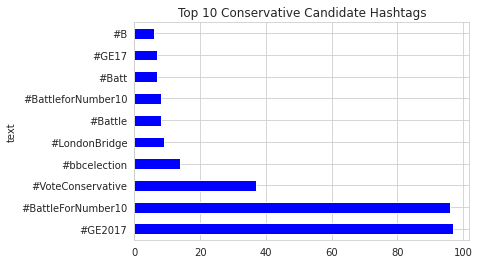

In [33]:
#visulising the data of top 10 tweets by party candidate pie chart
pop_con.plot(kind = 'barh', color = 'b')
plt.title("Top 10 Conservative Candidate Hashtags", fontsize=12)
plt.show

<function matplotlib.pyplot.show>

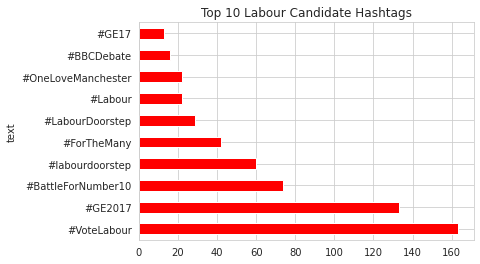

In [34]:
pop_lab.plot(kind = 'barh', color = 'r')
plt.title("Top 10 Labour Candidate Hashtags", fontsize=12)
plt.show

<function matplotlib.pyplot.show>

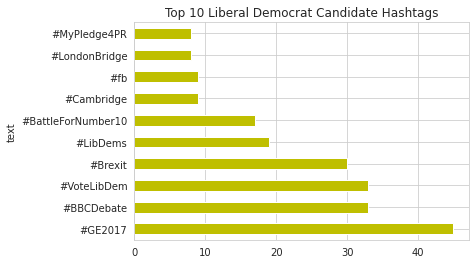

In [35]:
pop_lib.plot(kind = 'barh', color = 'y')
plt.title("Top 10 Liberal Democrat Candidate Hashtags", fontsize=12)
plt.show

<function matplotlib.pyplot.show>

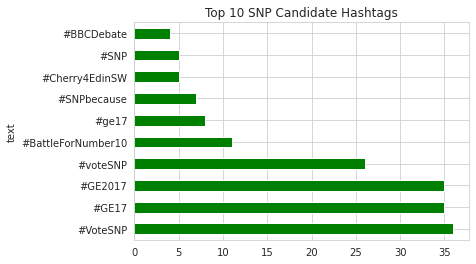

In [36]:
pop_snp.plot(kind = 'barh', color = 'g')
plt.title("Top 10 SNP Candidate Hashtags", fontsize=12)
plt.show

<function matplotlib.pyplot.show>

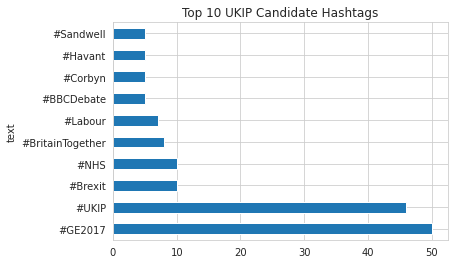

In [37]:
pop_ukip.plot(kind = 'barh')
plt.title("Top 10 UKIP Candidate Hashtags", fontsize=12)
plt.show

In [38]:
#Which parties candidate are more likely to tweet 
party_tweet = df_merge_cand['party_name_full'].value_counts()
party_tweet.head(11) 

Labour                 1327
Conservatives           750
LibDem                  665
Green                   408
UKIP                    319
SNP                     277
Plaid Cymru             110
SDLP                     24
Sinn Fein                19
Ulster Unionist          17
Democratic Unionist       7
Name: party_name_full, dtype: int64

([<matplotlib.patches.Wedge at 0x7fa26a9f2c88>,
 [Text(0.5351856734977708, 0.961028769019293, 'Labour'),
  Text(-1.0063517490750682, 0.444135291474964, 'Conservatives'),
  Text(-0.8287759015074706, -0.7232776127328148, 'LibDem'),
  Text(0.0066066551502298836, -1.0999801598700434, 'Green'),
  Text(0.610348784847031, -0.915136252607093, 'UKIP'),
  Text(0.9625249914090896, -0.5324900383227201, 'SNP'),
  Text(1.0790673849843389, -0.21357335663200316, 'Plaid Cymru'),
  Text(2.091857504298141, -0.18474896944652114, 'SDLP'),
  Text(2.0969779697420874, -0.11262057723326409, 'Sinn Fein'),
  Text(2.0993529235502844, -0.05212775058329787, 'Ulster Unionist'),
  Text(2.5999591482543085, -0.014574889664495782, 'Democratic Unionist')],
 [Text(0.437879187407267, 0.7862962655612398, '33.8%'),
  Text(-0.823378703788692, 0.3633834202976978, '19.1%'),
  Text(-0.6780893739606577, -0.5917725922359394, '17.0%'),
  Text(0.005405445122915359, -0.899983767166399, '10.4%'),
  Text(0.49937627851120714, -0.7487478

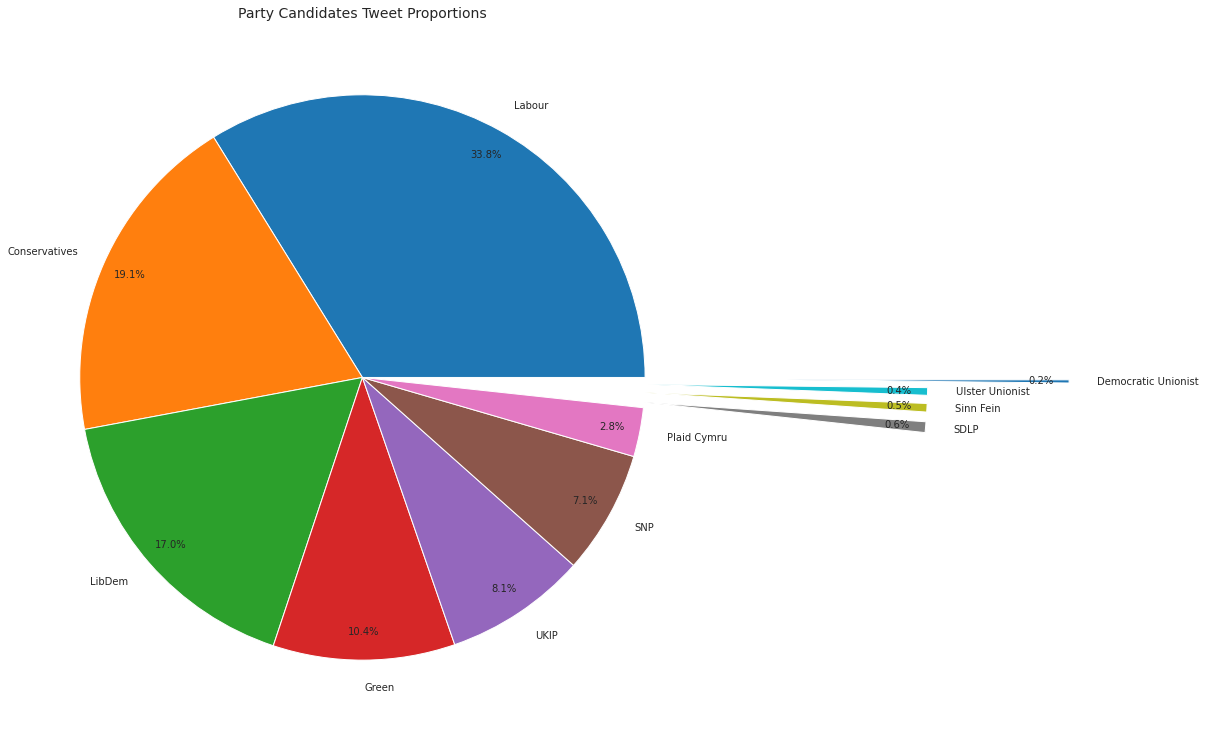

In [49]:
#visulising which party candidates are more likely to tweet 
party_tweet_vis = party_tweet
pie, ax = plt.subplots(figsize=[15,13])
labels = party_tweet_vis.keys()
plt.title("Party Candidates Tweet Proportions", fontsize=14)
plt.pie(x=party_tweet_vis, autopct="%.1f%%", explode= (0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1.5), labels=labels, pctdistance= 0.9)



In [40]:
#party of whose candidates has the largest number of followers 

followers = pd.read_sql_query("SELECT screen_name, followers_count FROM users " , connected)
df_followers_merge = pd.merge(followers, df_cand, on = 'screen_name')
df_followers_merge.head(20)

,screen_name,followers_count,party_name,cand_name,incumbent,dist_name,dist_number,party_name_full
0,cllrkemp,3914.0,LD,Richard Kemp,False,LIVERPOOL WAVERTREE,372,LibDem
1,stevebeasant,3429.0,LD,Steve Beasant,False,GREAT GRIMSBY,276,LibDem
2,joannaccherry,14993.0,SNP,Joanna Cherry,True,EDINBURGH SOUTH WEST,231,SNP
3,MHLabourParty,392.0,Lab,Andy Thomas,False,HARBOROUGH,291,Labour
4,isogrant,838.0,C,Isobel Grant,False,EALING NORTH,219,Conservatives
5,RichardHilton1,2744.0,UKIP,Richard Hilton,False,MITCHAM & MORDEN,399,UKIP
6,JamesDuddridge,11918.0,C,James Duddridge,True,ROCHFORD & SOUTHEND EAST,476,Conservatives
7,Sandbach,5765.0,C,Antoinette Sandbach,True,EDDISBURY,227,Conservatives
8,DarrylMagher,1578.0,UKIP,Darryl Magher,False,WARLEY,598,UKIP
9,esbagshaw,4413.0,LD,Elaine Bagshaw,False,POPLAR & LIMEHOUSE,456,LibDem


In [41]:
followers_party = df_followers_merge[['party_name_full','followers_count']].groupby('party_name_full').sum()
followers_party = followers_party.sort_values('followers_count', ascending = False)
followers_party

,followers_count
party_name_full,
Labour,5873071.0
Conservatives,2736249.0
LibDem,1105792.0
SNP,885867.0
Green,542161.0
UKIP,191848.0
Sinn Fein,68351.0
Democratic Unionist,49097.0
Plaid Cymru,42068.0


<function matplotlib.pyplot.show>

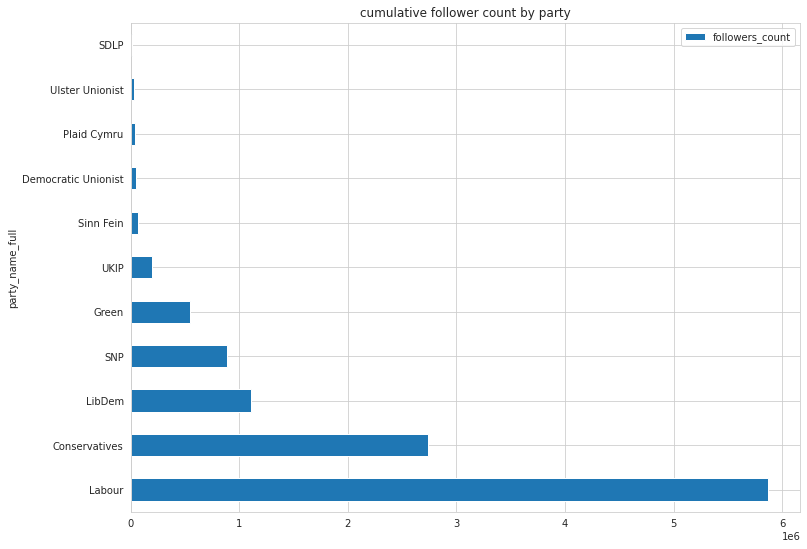

In [42]:
followers_party.plot(kind = 'barh', figsize=[12,9])
plt.title("cumulative follower count by party", fontsize=12)
plt.show

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


([<matplotlib.patches.Wedge at 0x7fa268907a20>,
 [Text(-0.030193532872020413, 1.0995855358146116, 'Labour'),
  Text(-0.7667527850073765, -0.7887269278295448, 'Conservative'),
  Text(0.29792737270966957, -1.0588858675940074, 'Liberal Democrats'),
  Text(0.801449759020467, -0.7534442804654073, 'SNP'),
  Text(1.0271734596475721, -0.393592027098667, 'Green'),
  Text(1.0848470562362786, -0.18195291856818485, 'UKIP'),
  Text(1.0950016028994582, -0.10474487886105627, 'Sinn Fein'),
  Text(2.2953782098152358, -0.14573563018495367, 'Democratic Unionist'),
  Text(2.2982870327187177, -0.08875086048592616, 'Plaid Cymru'),
  Text(2.299629746089092, -0.04126779497646246, 'Ulster Unionist'),
  Text(2.9999713676446857, -0.013106994776570624, 'SLDP')],
 [Text(-0.024703799622562153, 0.8996608929392276, '50.9%'),
  Text(-0.6273431877333081, -0.6453220318605366, '23.7%'),
  Text(0.24375875948972964, -0.8663611643950969, '9.6%'),
  Text(0.6557316210167458, -0.6164544112898788, '7.7%'),
  Text(0.840414648802

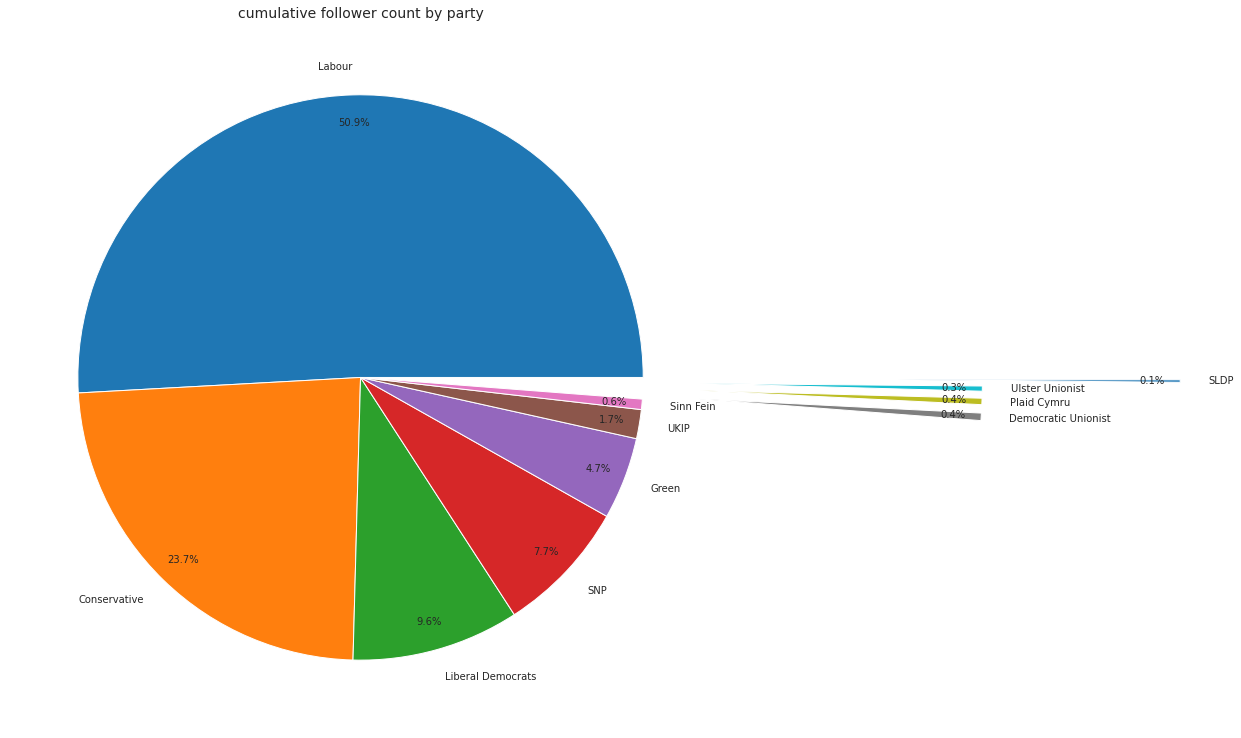

In [47]:
pie, ax = plt.subplots(figsize=[15,13])
labels = ['Labour', 'Conservative', 'Liberal Democrats', 'SNP', 'Green', 'UKIP', 'Sinn Fein', 'Democratic Unionist', 'Plaid Cymru', 'Ulster Unionist', 'SLDP']
plt.title("cumulative follower count by party", fontsize=14)
plt.pie(x = followers_party, autopct="%.1f%%", explode= (0, 0, 0, 0, 0, 0, 0, 1.2, 1.2, 1.2, 1.9), labels = labels, pctdistance= 0.9)

The first question investigated in this part of the assignment was which hashtags were more popular for each respective party. The findings from the data analysis found that one of the most popular hashtags used for each party were hashtags directly referring to the 2017 general election, with the popular hashtag being #GE2017 and #battlefornumber10 which was commonly used by all the 5 largest parties in the election. This hashtag was likely popular due to political candidates from each party wanting to directly communicate with people searching about the 2017 general election via their Twitter accounts and as the data retrieved was about the 2017 election, it makes sense that this was a commonly used as a hashtag. Another popular hashtag used by party candidates was a hashtag stating to vote their respective party. Naturally, these hashtags would be popular to use as it spreads the message to potential voters using Twitter accounts to vote for their respective party in the upcoming general election. Interestingly, the #brexit was only a popular hashtag for the two smallest parties out of the 5 largest parties investigated in this question. This is likely because they were the only two parties that took a clear stance on Brexit during the 2017 election where Brexit negotiations were ongoing, with UKIP wanting a clean break from the EU whereas the Liberal Democrats campaigned on keeping us in the EU despite the referendum results. So it is likely those two parties wanted to convey their clear respective messages on Twitter.

The second question investigated in this assignment was which parties candidates were more likely to tweet. The conclusion from the data analysis conducted revealed that Labour candidates tweeted the most during the 2017 election period with them having around 14% more of the overall tweet share than the conservative candidates who had the second-highest tweet share. The data visualized above shows that the Liberal Democrats were not far behind which is interesting as they are comparatively a much smaller party than the conservatives and have much fewer MPs but have a similar Twitter presence to the conservative party in terms of tweets posted by party candidates. However, in a way this data is rather unsurprising as parties like Labour, the Liberal Democrats and the Green party need to appeal to younger voters to perform well electorally, to do so they must have a strong presence on platforms such as Twitter. On the other hand the main voter base of the conservative party tends to be older and much less likely to use new media platforms such as Twitter.

The Last question investigated in this part of the assignment was which party had the most cumulative followers. The conclusion from the data analysis conducted shows us that Labour by a quite substantial margin has the largest following on Twitter. Labour has over the twice the following that the conservatives have on Twitter and has the over half the follower the share out of all the political parties. This result is intriguing as it is clear Labour are very dominant in the Twitter domain in terms of whom they can reach. These results also suggest the demographic and political bias of Twitter, as a hypothesis can be generated from this data stating that Twitter users are more likely to be left-wing and left-leaning politically as although Labour are dominant on Twitter, electorally in the 2017 elections they still somewhat fell short of winning the election. Ultimately we may be able to conclude that analysing Twitter maybe be insufficient when analysing a political parties chance of success in an election. 